In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

((36805, 16000, 1),
 (36805,),
 (4293, 16000, 1),
 (4293,),
 (4815, 16000, 1),
 (4815,),
 (16, 2))

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_custom_DO(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=5, filters=64, strides=1, padding='same', 
                      input_shape=input_shape)) 
    model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size=3, strides=3, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=5, filters=64*(2**int((i+1)/4)), strides=1, 
                          padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling1D(pool_size=2, strides=2))

    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 14):
    model = build_1d_cnn_custom_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16000, 64)         384       
_________________________________________________________________
activation (Activation)      (None, 16000, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024000)           0         
_________________________________________________________________
dropout (Dropout)            (None, 1024000)           0         
_________________________________________________________________
dense (Dense)                (None, 16)                16384016  
Total params: 16,384,400
Trainable params: 16,384,400
Non-trainable params: 0
_________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_15 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_16 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_17 (Activation)   (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_36 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_37 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_28 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_38 (Activation)   (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_55 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_55 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_56 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_57 (Activation)   (None, 8000, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_78 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_78 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_79 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_79 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_66 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_80 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_80 (Activation)   (None, 8000, 64)          0         
__________

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1732 - acc: 0.3211
Epoch 00001: val_loss improved from inf to 1.86342, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_3_conv_checkpoint/001-1.8634.hdf5
36805/36805 [==============================] - 55s 1ms/sample - loss: 2.1731 - acc: 0.3211 - val_loss: 1.8634 - val_acc: 0.4088
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.5918 - acc: 0.5194
Epoch 00002: val_loss improved from 1.86342 to 1.56657, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_3_conv_checkpoint/002-1.5666.hdf5
36805/36805 [==============================] - 54s 1ms/sample - loss: 1.5918 - acc: 0.5194 - val_loss: 1.5666 - val_acc: 0.5204
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.2863 - acc: 0.6115
Epoch 00003: val_loss improved from 1.56657 to 1.52970, saving model 

Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9833
Epoch 00029: val_loss did not improve from 1.52970
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0674 - acc: 0.9833 - val_loss: 3.1843 - val_acc: 0.5269
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0697 - acc: 0.9826
Epoch 00030: val_loss did not improve from 1.52970
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0697 - acc: 0.9826 - val_loss: 3.2252 - val_acc: 0.5222
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0660 - acc: 0.9834
Epoch 00031: val_loss did not improve from 1.52970
36805/36805 [==============================] - 54s 1ms/sample - loss: 0.0660 - acc: 0.9834 - val_loss: 3.2990 - val_acc: 0.5323
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0662 - acc: 0.9844
Epoch 00032: val_loss did not improve from 1.52970
36805/36805 [===========

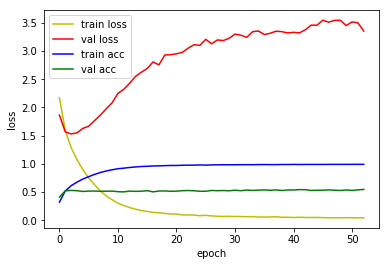

4815/4815 [==============================] - 3s 650us/sample - loss: 1.5832 - acc: 0.5036
Loss: 1.5832462274396901 Accuracy: 0.50363445

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1101 - acc: 0.3323
Epoch 00001: val_loss improved from inf to 1.67202, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_4_conv_checkpoint/001-1.6720.hdf5
36805/36805 [==============================] - 60s 2ms/sample - loss: 2.1099 - acc: 0.3323 - val_loss: 1.6720 - val_acc: 0.4945
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4675 - acc: 0.5471
Epoch 00002: val_loss improved from 1.67202 to 1.41502, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_4_conv_checkpoint/002-1.4150.hdf5
36805/36805 [==============================] - 58s 2ms/sample - loss: 1.4674 - acc: 0.5471 - val_loss: 1.4150 - val_acc: 0.5688
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1

36800/36805 [============================>.] - ETA: 0s - loss: 0.0817 - acc: 0.9782
Epoch 00029: val_loss did not improve from 1.33476
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0817 - acc: 0.9782 - val_loss: 2.5189 - val_acc: 0.6056
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0812 - acc: 0.9776
Epoch 00030: val_loss did not improve from 1.33476
36805/36805 [==============================] - 58s 2ms/sample - loss: 0.0812 - acc: 0.9776 - val_loss: 2.3954 - val_acc: 0.6196
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0766 - acc: 0.9793
Epoch 00031: val_loss did not improve from 1.33476
36805/36805 [==============================] - 59s 2ms/sample - loss: 0.0766 - acc: 0.9793 - val_loss: 2.3479 - val_acc: 0.6292
Epoch 32/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0735 - acc: 0.9805
Epoch 00032: val_loss did not improve from 1.33476
36805/36805 [========================

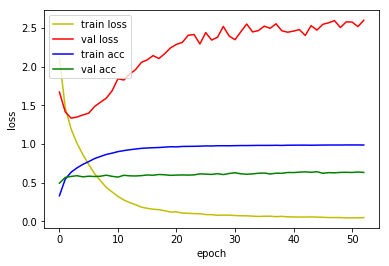

4815/4815 [==============================] - 3s 698us/sample - loss: 1.3960 - acc: 0.5597
Loss: 1.396030033439367 Accuracy: 0.55970925

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.9887 - acc: 0.3633
Epoch 00001: val_loss improved from inf to 1.54432, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_5_conv_checkpoint/001-1.5443.hdf5
36805/36805 [==============================] - 66s 2ms/sample - loss: 1.9886 - acc: 0.3633 - val_loss: 1.5443 - val_acc: 0.4955
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3923 - acc: 0.5609
Epoch 00002: val_loss improved from 1.54432 to 1.30406, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_5_conv_checkpoint/002-1.3041.hdf5
36805/36805 [==============================] - 64s 2ms/sample - loss: 1.3923 - acc: 0.5609 - val_loss: 1.3041 - val_acc: 0.6007
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

36800/36805 [============================>.] - ETA: 0s - loss: 0.0585 - acc: 0.9840
Epoch 00028: val_loss did not improve from 1.15014
36805/36805 [==============================] - 64s 2ms/sample - loss: 0.0585 - acc: 0.9841 - val_loss: 2.0634 - val_acc: 0.6823
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0563 - acc: 0.9848
Epoch 00029: val_loss did not improve from 1.15014
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0563 - acc: 0.9848 - val_loss: 1.9410 - val_acc: 0.6830
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9864
Epoch 00030: val_loss did not improve from 1.15014
36805/36805 [==============================] - 63s 2ms/sample - loss: 0.0516 - acc: 0.9864 - val_loss: 1.9439 - val_acc: 0.6802
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9863
Epoch 00031: val_loss did not improve from 1.15014
36805/36805 [========================

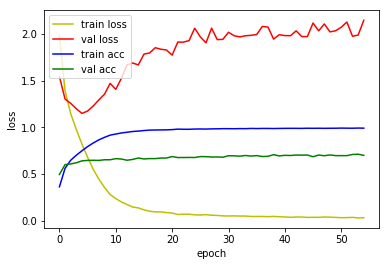

4815/4815 [==============================] - 4s 755us/sample - loss: 1.2224 - acc: 0.6233
Loss: 1.222374301065661 Accuracy: 0.6232606

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.0112 - acc: 0.3488
Epoch 00001: val_loss improved from inf to 1.48009, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_6_conv_checkpoint/001-1.4801.hdf5
36805/36805 [==============================] - 70s 2ms/sample - loss: 2.0112 - acc: 0.3488 - val_loss: 1.4801 - val_acc: 0.5332
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3653 - acc: 0.5741
Epoch 00002: val_loss improved from 1.48009 to 1.19642, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_6_conv_checkpoint/002-1.1964.hdf5
36805/36805 [==============================] - 67s 2ms/sample - loss: 1.3653 - acc: 0.5741 - val_loss: 1.1964 - val_acc: 0.6271
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1

36800/36805 [============================>.] - ETA: 0s - loss: 0.0798 - acc: 0.9774
Epoch 00028: val_loss did not improve from 0.88119
36805/36805 [==============================] - 67s 2ms/sample - loss: 0.0798 - acc: 0.9774 - val_loss: 1.1899 - val_acc: 0.7666
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0744 - acc: 0.9776
Epoch 00029: val_loss did not improve from 0.88119
36805/36805 [==============================] - 67s 2ms/sample - loss: 0.0744 - acc: 0.9776 - val_loss: 1.3667 - val_acc: 0.7661
Epoch 30/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0759 - acc: 0.9776
Epoch 00030: val_loss did not improve from 0.88119
36805/36805 [==============================] - 67s 2ms/sample - loss: 0.0759 - acc: 0.9776 - val_loss: 1.2834 - val_acc: 0.7654
Epoch 31/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9811
Epoch 00031: val_loss did not improve from 0.88119
36805/36805 [========================

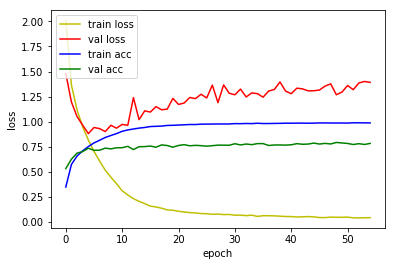

4815/4815 [==============================] - 4s 814us/sample - loss: 0.9725 - acc: 0.7084
Loss: 0.9725124305530005 Accuracy: 0.7084112

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.0534 - acc: 0.3279
Epoch 00001: val_loss improved from inf to 1.47903, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_7_conv_checkpoint/001-1.4790.hdf5
36805/36805 [==============================] - 73s 2ms/sample - loss: 2.0535 - acc: 0.3279 - val_loss: 1.4790 - val_acc: 0.5250
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4275 - acc: 0.5430
Epoch 00002: val_loss improved from 1.47903 to 1.23961, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_7_conv_checkpoint/002-1.2396.hdf5
36805/36805 [==============================] - 69s 2ms/sample - loss: 1.4275 - acc: 0.5430 - val_loss: 1.2396 - val_acc: 0.6096
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1212 - acc: 0.9624
Epoch 00026: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.1212 - acc: 0.9624 - val_loss: 0.7191 - val_acc: 0.8463
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1127 - acc: 0.9650
Epoch 00027: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.1126 - acc: 0.9650 - val_loss: 0.7013 - val_acc: 0.8509
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1065 - acc: 0.9672
Epoch 00028: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.1065 - acc: 0.9672 - val_loss: 0.7105 - val_acc: 0.8546
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0979 - acc: 0.9692
Epoch 00029: val_loss did not improve from 0.58052
36805/36805 [===========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0464 - acc: 0.9872
Epoch 00056: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.0464 - acc: 0.9872 - val_loss: 0.7955 - val_acc: 0.8565
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9857
Epoch 00057: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.0507 - acc: 0.9857 - val_loss: 0.7734 - val_acc: 0.8726
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0454 - acc: 0.9882
Epoch 00058: val_loss did not improve from 0.58052
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.0454 - acc: 0.9882 - val_loss: 0.7650 - val_acc: 0.8696
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0487 - acc: 0.9863
Epoch 00059: val_loss did not improve from 0.58052
36805/36805 [===========

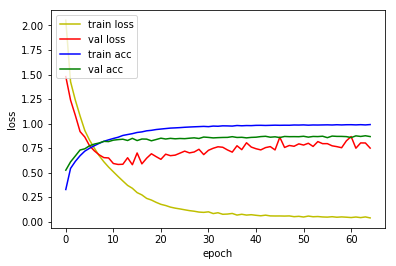

4815/4815 [==============================] - 4s 824us/sample - loss: 0.6998 - acc: 0.8102
Loss: 0.6997917437355342 Accuracy: 0.81017655

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2025 - acc: 0.2750
Epoch 00001: val_loss improved from inf to 1.50535, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_8_conv_checkpoint/001-1.5053.hdf5
36805/36805 [==============================] - 75s 2ms/sample - loss: 2.2024 - acc: 0.2750 - val_loss: 1.5053 - val_acc: 0.5164
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.4457 - acc: 0.5276
Epoch 00002: val_loss improved from 1.50535 to 1.23907, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_8_conv_checkpoint/002-1.2391.hdf5
36805/36805 [==============================] - 70s 2ms/sample - loss: 1.4457 - acc: 0.5275 - val_loss: 1.2391 - val_acc: 0.6157
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1

Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1609 - acc: 0.9488
Epoch 00025: val_loss did not improve from 0.37356
36805/36805 [==============================] - 69s 2ms/sample - loss: 0.1609 - acc: 0.9488 - val_loss: 0.3784 - val_acc: 0.9059
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1551 - acc: 0.9500
Epoch 00026: val_loss did not improve from 0.37356
36805/36805 [==============================] - 69s 2ms/sample - loss: 0.1551 - acc: 0.9500 - val_loss: 0.3741 - val_acc: 0.9061
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1412 - acc: 0.9536
Epoch 00027: val_loss did not improve from 0.37356
36805/36805 [==============================] - 69s 2ms/sample - loss: 0.1412 - acc: 0.9536 - val_loss: 0.3812 - val_acc: 0.9050
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1350 - acc: 0.9569
Epoch 00028: val_loss did not improve from 0.37356
36805/36805 [===========

Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0593 - acc: 0.9816
Epoch 00055: val_loss did not improve from 0.37356
36805/36805 [==============================] - 69s 2ms/sample - loss: 0.0593 - acc: 0.9816 - val_loss: 0.4739 - val_acc: 0.9140
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0524 - acc: 0.9840
Epoch 00056: val_loss did not improve from 0.37356
36805/36805 [==============================] - 69s 2ms/sample - loss: 0.0524 - acc: 0.9840 - val_loss: 0.4287 - val_acc: 0.9187
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0510 - acc: 0.9852
Epoch 00057: val_loss did not improve from 0.37356
36805/36805 [==============================] - 68s 2ms/sample - loss: 0.0510 - acc: 0.9852 - val_loss: 0.4505 - val_acc: 0.9152
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0565 - acc: 0.9824
Epoch 00058: val_loss did not improve from 0.37356
36805/36805 [===========

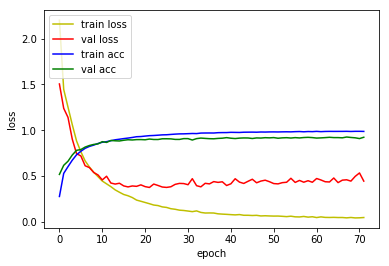

4815/4815 [==============================] - 4s 871us/sample - loss: 0.4463 - acc: 0.8708
Loss: 0.44626714471468426 Accuracy: 0.87082034

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1511 - acc: 0.2899
Epoch 00001: val_loss improved from inf to 1.39764, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_9_conv_checkpoint/001-1.3976.hdf5
36805/36805 [==============================] - 78s 2ms/sample - loss: 2.1511 - acc: 0.2899 - val_loss: 1.3976 - val_acc: 0.5525
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3180 - acc: 0.5744
Epoch 00002: val_loss improved from 1.39764 to 1.13474, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_9_conv_checkpoint/002-1.1347.hdf5
36805/36805 [==============================] - 71s 2ms/sample - loss: 1.3179 - acc: 0.5744 - val_loss: 1.1347 - val_acc: 0.6403
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1034 - acc: 0.9651
Epoch 00026: val_loss did not improve from 0.27808
36805/36805 [==============================] - 70s 2ms/sample - loss: 0.1034 - acc: 0.9651 - val_loss: 0.3181 - val_acc: 0.9297
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1019 - acc: 0.9676
Epoch 00027: val_loss did not improve from 0.27808
36805/36805 [==============================] - 70s 2ms/sample - loss: 0.1019 - acc: 0.9676 - val_loss: 0.3160 - val_acc: 0.9264
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0915 - acc: 0.9689
Epoch 00028: val_loss did not improve from 0.27808
36805/36805 [==============================] - 70s 2ms/sample - loss: 0.0915 - acc: 0.9689 - val_loss: 0.3249 - val_acc: 0.9264
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0890 - acc: 0.9709
Epoch 00029: val_loss did not improve from 0.27808
36805/36805 [===========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0343 - acc: 0.9887
Epoch 00056: val_loss did not improve from 0.27808
36805/36805 [==============================] - 70s 2ms/sample - loss: 0.0343 - acc: 0.9887 - val_loss: 0.3459 - val_acc: 0.9408
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0364 - acc: 0.9879
Epoch 00057: val_loss did not improve from 0.27808
36805/36805 [==============================] - 71s 2ms/sample - loss: 0.0364 - acc: 0.9879 - val_loss: 0.3244 - val_acc: 0.9399
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0345 - acc: 0.9889
Epoch 00058: val_loss did not improve from 0.27808
36805/36805 [==============================] - 71s 2ms/sample - loss: 0.0345 - acc: 0.9889 - val_loss: 0.3439 - val_acc: 0.9404
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0357 - acc: 0.9885
Epoch 00059: val_loss did not improve from 0.27808
36805/36805 [===========

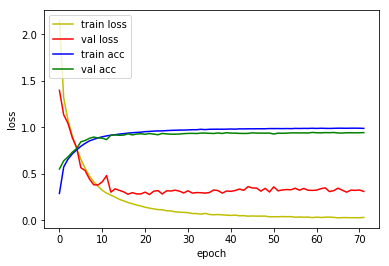

4815/4815 [==============================] - 4s 914us/sample - loss: 0.3063 - acc: 0.9153
Loss: 0.3063253529779884 Accuracy: 0.9152648

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2412 - acc: 0.2622
Epoch 00001: val_loss improved from inf to 1.41011, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_10_conv_checkpoint/001-1.4101.hdf5
36805/36805 [==============================] - 81s 2ms/sample - loss: 2.2412 - acc: 0.2622 - val_loss: 1.4101 - val_acc: 0.5451
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.3025 - acc: 0.5777
Epoch 00002: val_loss improved from 1.41011 to 0.98192, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_10_conv_checkpoint/002-0.9819.hdf5
36805/36805 [==============================] - 72s 2ms/sample - loss: 1.3024 - acc: 0.5777 - val_loss: 0.9819 - val_acc: 0.6995
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 

Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9653
Epoch 00025: val_loss did not improve from 0.17243
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.1027 - acc: 0.9653 - val_loss: 0.1954 - val_acc: 0.9502
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1039 - acc: 0.9649
Epoch 00026: val_loss did not improve from 0.17243
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.1039 - acc: 0.9649 - val_loss: 0.1957 - val_acc: 0.9483
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1012 - acc: 0.9658
Epoch 00027: val_loss did not improve from 0.17243
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.1012 - acc: 0.9658 - val_loss: 0.1740 - val_acc: 0.9532
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0850 - acc: 0.9717
Epoch 00028: val_loss improved from 0.17243 to 0.16759, saving model to mod

Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0323 - acc: 0.9896
Epoch 00054: val_loss did not improve from 0.16244
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0323 - acc: 0.9896 - val_loss: 0.2064 - val_acc: 0.9576
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0361 - acc: 0.9883
Epoch 00055: val_loss did not improve from 0.16244
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0361 - acc: 0.9883 - val_loss: 0.1964 - val_acc: 0.9588
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0341 - acc: 0.9887
Epoch 00056: val_loss did not improve from 0.16244
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0341 - acc: 0.9887 - val_loss: 0.1985 - val_acc: 0.9555
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0335 - acc: 0.9889
Epoch 00057: val_loss did not improve from 0.16244
36805/36805 [===========

Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0198 - acc: 0.9933
Epoch 00084: val_loss did not improve from 0.16244
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0198 - acc: 0.9933 - val_loss: 0.2202 - val_acc: 0.9574

1D_CNN_custom_pool_2_DO_10_conv Model


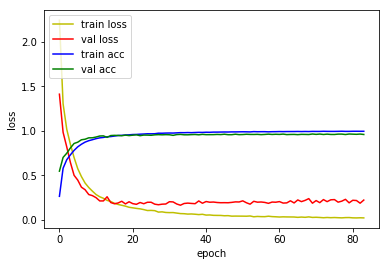

4815/4815 [==============================] - 4s 926us/sample - loss: 0.2203 - acc: 0.9435
Loss: 0.22033937996947753 Accuracy: 0.9435099

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1624 - acc: 0.2850
Epoch 00001: val_loss improved from inf to 1.29230, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_11_conv_checkpoint/001-1.2923.hdf5
36805/36805 [==============================] - 85s 2ms/sample - loss: 2.1624 - acc: 0.2850 - val_loss: 1.2923 - val_acc: 0.5875
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.1597 - acc: 0.6193
Epoch 00002: val_loss improved from 1.29230 to 0.79907, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_11_conv_checkpoint/002-0.7991.hdf5
36805/36805 [==============================] - 73s 2ms/sample - loss: 1.1597 - acc: 0.6193 - val_loss: 0.7991 - val_acc: 0.7375
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss:

Epoch 25/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0922 - acc: 0.9691
Epoch 00025: val_loss did not improve from 0.13250
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0922 - acc: 0.9691 - val_loss: 0.1484 - val_acc: 0.9576
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0875 - acc: 0.9700
Epoch 00026: val_loss improved from 0.13250 to 0.13194, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_11_conv_checkpoint/026-0.1319.hdf5
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0875 - acc: 0.9700 - val_loss: 0.1319 - val_acc: 0.9627
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0836 - acc: 0.9727
Epoch 00027: val_loss improved from 0.13194 to 0.13048, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_11_conv_checkpoint/027-0.1305.hdf5
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0836 - acc: 0.9727 - val_loss: 0.1

36800/36805 [============================>.] - ETA: 0s - loss: 0.0310 - acc: 0.9894
Epoch 00053: val_loss did not improve from 0.11292
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0310 - acc: 0.9894 - val_loss: 0.1795 - val_acc: 0.9672
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0312 - acc: 0.9896
Epoch 00054: val_loss did not improve from 0.11292
36805/36805 [==============================] - 72s 2ms/sample - loss: 0.0311 - acc: 0.9896 - val_loss: 0.1336 - val_acc: 0.9686
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0283 - acc: 0.9904
Epoch 00055: val_loss did not improve from 0.11292
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0282 - acc: 0.9904 - val_loss: 0.1481 - val_acc: 0.9674
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0288 - acc: 0.9903
Epoch 00056: val_loss did not improve from 0.11292
36805/36805 [========================

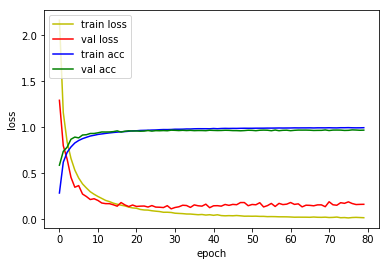

4815/4815 [==============================] - 5s 943us/sample - loss: 0.1658 - acc: 0.9499
Loss: 0.16580953433227688 Accuracy: 0.9499481

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.1723 - acc: 0.2893
Epoch 00001: val_loss improved from inf to 1.16824, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_12_conv_checkpoint/001-1.1682.hdf5
36805/36805 [==============================] - 87s 2ms/sample - loss: 2.1722 - acc: 0.2894 - val_loss: 1.1682 - val_acc: 0.6129
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.0787 - acc: 0.6436
Epoch 00002: val_loss improved from 1.16824 to 0.71270, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_12_conv_checkpoint/002-0.7127.hdf5
36805/36805 [==============================] - 74s 2ms/sample - loss: 1.0786 - acc: 0.6436 - val_loss: 0.7127 - val_acc: 0.7715
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss:

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0701 - acc: 0.9768
Epoch 00026: val_loss did not improve from 0.11940
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0700 - acc: 0.9768 - val_loss: 0.1516 - val_acc: 0.9571
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0674 - acc: 0.9779
Epoch 00027: val_loss did not improve from 0.11940
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0674 - acc: 0.9779 - val_loss: 0.1346 - val_acc: 0.9606
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0626 - acc: 0.9791
Epoch 00028: val_loss did not improve from 0.11940
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0626 - acc: 0.9791 - val_loss: 0.1450 - val_acc: 0.9630
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0585 - acc: 0.9800
Epoch 00029: val_loss did not improve from 0.11940
36805/36805 [===========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.9916
Epoch 00056: val_loss did not improve from 0.11940
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0250 - acc: 0.9916 - val_loss: 0.1682 - val_acc: 0.9616
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0225 - acc: 0.9926
Epoch 00057: val_loss did not improve from 0.11940
36805/36805 [==============================] - 73s 2ms/sample - loss: 0.0225 - acc: 0.9926 - val_loss: 0.2128 - val_acc: 0.9620
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0253 - acc: 0.9916
Epoch 00058: val_loss did not improve from 0.11940
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0253 - acc: 0.9916 - val_loss: 0.1606 - val_acc: 0.9672
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0202 - acc: 0.9929
Epoch 00059: val_loss did not improve from 0.11940
36805/36805 [===========

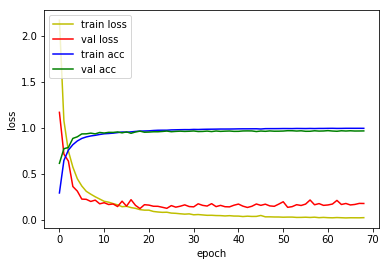

4815/4815 [==============================] - 5s 959us/sample - loss: 0.1764 - acc: 0.9483
Loss: 0.17644321271377933 Accuracy: 0.9482866

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.0418 - acc: 0.3329
Epoch 00001: val_loss improved from inf to 1.04063, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_13_conv_checkpoint/001-1.0406.hdf5
36805/36805 [==============================] - 91s 2ms/sample - loss: 2.0419 - acc: 0.3329 - val_loss: 1.0406 - val_acc: 0.6534
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.9230 - acc: 0.6920
Epoch 00002: val_loss improved from 1.04063 to 0.66953, saving model to model/checkpoint/1D_CNN_custom_pool_2_DO_13_conv_checkpoint/002-0.6695.hdf5
36805/36805 [==============================] - 75s 2ms/sample - loss: 0.9232 - acc: 0.6919 - val_loss: 0.6695 - val_acc: 0.7782
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss:

Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9840
Epoch 00026: val_loss did not improve from 0.13707
36805/36805 [==============================] - 75s 2ms/sample - loss: 0.0468 - acc: 0.9840 - val_loss: 0.1773 - val_acc: 0.9520
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0449 - acc: 0.9855
Epoch 00027: val_loss did not improve from 0.13707
36805/36805 [==============================] - 75s 2ms/sample - loss: 0.0449 - acc: 0.9855 - val_loss: 0.1843 - val_acc: 0.9553
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0408 - acc: 0.9867
Epoch 00028: val_loss did not improve from 0.13707
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0408 - acc: 0.9867 - val_loss: 0.1552 - val_acc: 0.9597
Epoch 29/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0390 - acc: 0.9876
Epoch 00029: val_loss did not improve from 0.13707
36805/36805 [===========

Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0162 - acc: 0.9949
Epoch 00056: val_loss did not improve from 0.13707
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0162 - acc: 0.9949 - val_loss: 0.2064 - val_acc: 0.9639
Epoch 57/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0161 - acc: 0.9949
Epoch 00057: val_loss did not improve from 0.13707
36805/36805 [==============================] - 75s 2ms/sample - loss: 0.0161 - acc: 0.9949 - val_loss: 0.2177 - val_acc: 0.9602
Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0177 - acc: 0.9942
Epoch 00058: val_loss did not improve from 0.13707
36805/36805 [==============================] - 74s 2ms/sample - loss: 0.0177 - acc: 0.9942 - val_loss: 0.1808 - val_acc: 0.9637
Epoch 59/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0159 - acc: 0.9957
Epoch 00059: val_loss did not improve from 0.13707
36805/36805 [===========

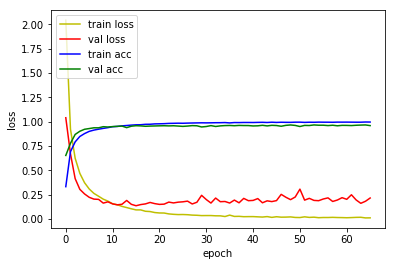

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.1985 - acc: 0.9437
Loss: 0.19850728744534565 Accuracy: 0.94371754



In [10]:
for i in range(3, 14):
    base = '1D_CNN_custom_pool_2_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_1d_cnn_custom_DO(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)
    
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = '1D_CNN_custom_pool_2_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(3, 14):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_93 (Activation)   (None, 80

4815/4815 [==============================] - 5s 972us/sample - loss: 0.9725 - acc: 0.7084
Loss: 0.9725124305530005 Accuracy: 0.7084112

1D_CNN_custom_pool_2_DO_7_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_109 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_109 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_110 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_110 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None,

4815/4815 [==============================] - 5s 1ms/sample - loss: 0.3063 - acc: 0.9153
Loss: 0.3063253529779884 Accuracy: 0.9152648

1D_CNN_custom_pool_2_DO_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_134 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 8000, 64)          0         
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.1658 - acc: 0.9499
Loss: 0.16580953433227688 Accuracy: 0.9499481

1D_CNN_custom_pool_2_DO_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_155 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_132 (MaxPoolin (None, 8000, 64)          0         
_________________________________________________________________
conv1d_156 (Conv1D)          (None,

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.1985 - acc: 0.9437
Loss: 0.19850728744534565 Accuracy: 0.94371754


In [12]:
# log_dir = 'log'
# os.makedirs(log_dir, exist_ok=True)
# base = '1D_CNN_custom_DO'

# with open(path.join(log_dir, base), 'w') as log_file:
for i in range(3, 14):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)

#         log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


1D_CNN_custom_pool_2_DO_3_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 16000, 64)         384       
_________________________________________________________________
activation_91 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 16000, 64)         20544     
_________________________________________________________________
activation_92 (Activation)   (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_78 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 8000, 64)          20544     
_________________________________________________________________
activation_93 (Activation)   (None, 80

4815/4815 [==============================] - 5s 1ms/sample - loss: 1.6249 - acc: 0.7578
Loss: 1.624868957176882 Accuracy: 0.7578401

1D_CNN_custom_pool_2_DO_7_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_109 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_109 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_110 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_110 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_92 (MaxPooling (None, 8000, 64)          0         
_________________________________________________________________
conv1d_111 (Conv1D)          (None, 80

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.3577 - acc: 0.9283
Loss: 0.357661056255502 Accuracy: 0.9283489

1D_CNN_custom_pool_2_DO_10_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_133 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_134 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_113 (MaxPoolin (None, 8000, 64)          0         
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 8

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.2003 - acc: 0.9568
Loss: 0.20034045435361655 Accuracy: 0.95680165

1D_CNN_custom_pool_2_DO_12_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_154 (Conv1D)          (None, 16000, 64)         384       
_________________________________________________________________
activation_154 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 16000, 64)         20544     
_________________________________________________________________
activation_155 (Activation)  (None, 16000, 64)         0         
_________________________________________________________________
max_pooling1d_132 (MaxPoolin (None, 8000, 64)          0         
_________________________________________________________________
conv1d_156 (Conv1D)          (None

4815/4815 [==============================] - 6s 1ms/sample - loss: 0.2853 - acc: 0.9475
Loss: 0.2853179139779496 Accuracy: 0.9474559
